#

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
import skimpy


In [21]:

df = pd.read_csv('./data/titanic.csv')
df.head()

In [22]:
df.shape
#查看形状

(891, 12)

In [23]:

skimpy.skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│ Data Summary Data Types │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ │
│ ┃ dataframe ┃ Values ┃ ┃ Column Type ┃ Count ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ │
│ │ Number of rows │ 891 │ │ int64 │ 5 │ │
│ │ Number of columns │ 12 │ │ string │ 5 │ │
│ └───────────────────┴────────┘ │ float64 │ 2 │ │
│ └─────────────┴───────┘ │
│ number │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ │
│ ┃ column_name ┃ NA ┃ NA % ┃ mean ┃ sd ┃ p0 ┃ p25 ┃ p50 ┃ p75 ┃ p100 ┃ hist ┃ │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ │
│ │ PassengerId │ 0 │ 0 │ 446 │ 257.4 │ 1 │ 223.5 │ 446 │ 668.5 │ 891 │ ▇▇▇▇▇▇ │ │
│ │ Survived │ 0 │ 0 │ 0.3838 │ 0.4866 │ 0 │ 0 │ 0 │ 1 │ 1 │ ▇ ▅ │ │
│ │ Pclass │ 0 │ 0 │ 2.309 │ 0.8361 │ 1 │ 2 │ 3 │ 3 │ 3 │ ▃ ▃ ▇ │ │
│ │ Age │ 177 │ 19.87 │ 29.7 │ 14.53 │ 0.42 │ 20.12 │ 28 │ 38 │ 80 │ ▂▇▇▃▁ │ │
│ │ SibSp │ 0 │ 0 │ 0.523 │ 1.103 │ 0 │ 0 │ 0 │ 1 │ 8 │ ▇ │ │
│ │ Parch │ 0 │ 0 │ 0.3816 │ 0.8061 │ 0 │ 0 │ 0 │ 0 │ 6 │ ▇▁▁ │ │
│ │ Fare │ 0 │ 0 │ 32.2 │ 49.69 │ 0 │ 7.91 │ 14.45 │ 31 │ 512.3 │ ▇ │ │
│ └────────────────┴──────┴─────────┴──────────┴──────────┴───────┴────────┴────────┴────────┴────────┴────────┘ │
│ string │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ column_name ┃ NA ┃ NA % ┃ words per row ┃ total words ┃ │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ Name │ 0 │ 0 │ 4.1 │ 3626 │ │
│ │ Sex │ 0 │ 0 │ 1 │ 891 │ │
│ │ Ticket │ 0 │ 0 │ 1.3 │ 1130 │ │
│ │ Cabin │ 687 │ 77.1 │ 0.27 │ 238 │ │
│ │ Embarked │ 2 │ 0.22 │ 1 │ 889 │ │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘ │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [24]:
df.isnull().sum()
#统计缺失值情况

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# 中位数填充age
df['Age'].fillna(df['Age'].median(), inplace=True)

# 众数填充 Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 删除 Cabin 列
df.drop(columns=['Cabin'], inplace=True)


/var/folders/sz/b50958sd0svgwh9b5nwg1d700000gn/T/ipykernel_25881/2909987607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/sz/b50958sd0svgwh9b5nwg1d700000gn/T/ipykernel_25881/2909987607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [26]:
df.isnull().sum()
#查看更新后的缺失值情况

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
df.shape
#查看形状

(891, 11)

In [28]:

df.info()

# 查看描述性统计
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB

In [29]:
# 查看 'Survived' 列的值分布
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

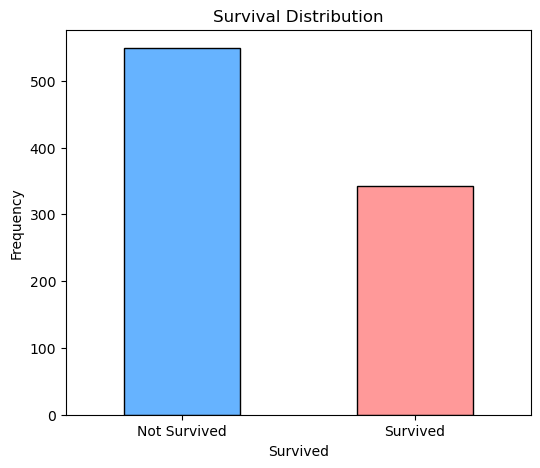

In [30]:
survived_counts = df['Survived'].value_counts()

# 绘制柱状图
plt.figure(figsize=(6, 5))
survived_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'], edgecolor='black')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.show()


In [31]:

# 查看 'Pclass' 列的分布
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 

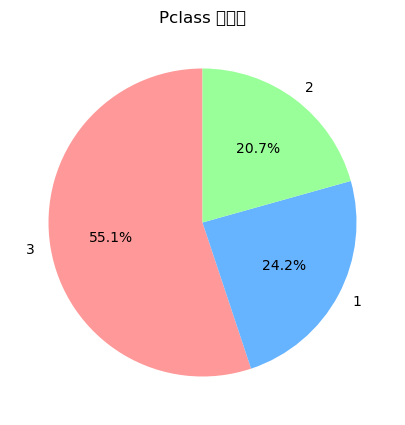

In [14]:
pclass_counts = df['Pclass'].value_counts()

# 绘制饼图
plt.figure(figsize=(6, 5))
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Pclass 分布图')
plt.show()


In [15]:
# 查看 Age 列的统计
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

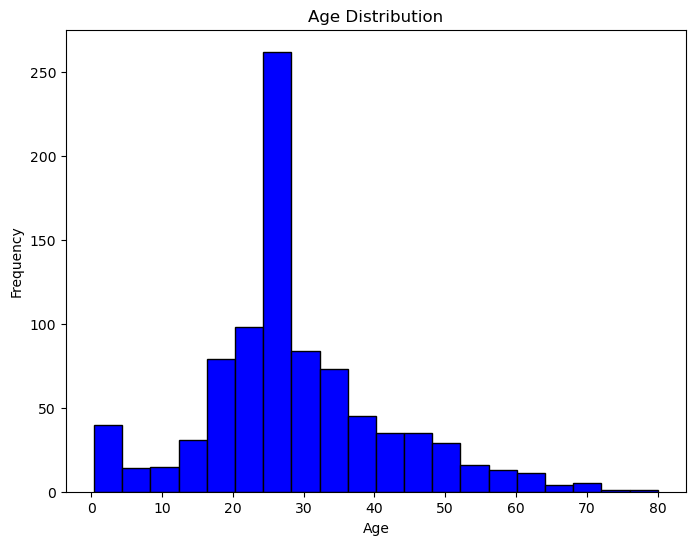

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, color='blue', edgecolor='black')  # 使用 dropna() 来移除缺失值
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:

numeric_df = df.select_dtypes(include=['number'])

numeric_df.corr()


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

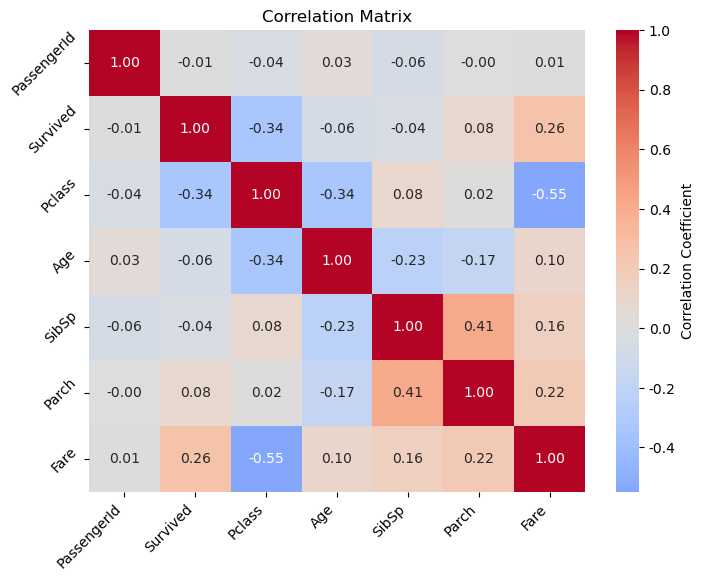

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={'label': 'Correlation Coefficient'}, xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=45, ha='right')  
plt.show()
